# Função exposição
A função exposição ou área integrada é a área de visão do Observatório em um determinado tempo. A função é:
$$\omega\,(\delta) = cos\,a_0\;cos\,\delta\;sin\,\alpha_m + \alpha_m\;sin\,a_0\;sin\,\delta,$$
em que:

$$\alpha_m = \left\{\begin{array}{rll}
0. & \hbox{se} & \xi > 1, \\
\pi. & \hbox{se} & \xi < -1, \\
\hbox{arccos},\,\xi & \hbox{caso contrário.}
\end{array}\right.$$

Sendo:

$$\xi = \dfrac{cos\,\theta_m - sin\,a_0\;sin\,\delta}{cos\,a_0\;cos\,\delta}.$$

Além disso, $\delta$ é a declinação do evento (coordenada equatorial celeste); $a_0 = -35,2^{\circ}$ é a latitude do Observatório; $\alpha_m$ é a seção reta máxima; e $\theta_m$ é a abertura zenital máxima do experimento.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
path = 'images/'
blue = '#117DF5'
dark_blue = '#086A99'
orange = '#FF7F27'

In [3]:
# Parametros
a0 = np.radians(-35.2)
theta_m = np.radians(60)
x_inicial = np.radians(-90)
x_final = np.radians(90)

In [4]:
# Cria delta
passo = 0.01
delta = np.arange(x_inicial, x_final, passo)

In [5]:
# Função exposição vazia
omega = np.zeros(len(delta))

In [6]:
for i in range(len(delta)):
    # Calcula xi
    xi = (np.cos(theta_m) - (np.sin(a0) * np.sin(delta[i])))/(np.cos(a0) * np.cos(delta[i]))
    if (xi > 1):
        alfa_m = 0
    elif (xi < (-1)):
        alfa_m = np.pi
    else:
        alfa_m = np.arccos(xi)

    omega[i] = ((np.cos(a0) * np.cos(delta[i]) * np.sin(alfa_m)) + (alfa_m * np.sin(a0) * np.sin(delta[i])))

In [7]:
# Volta para graus
delta_graus = np.degrees(delta)

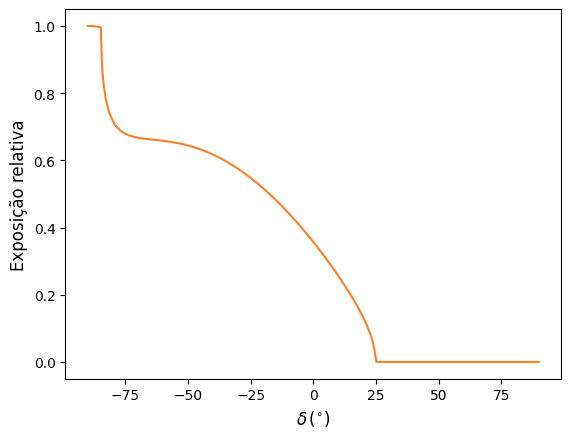

In [8]:
normalizacao = max(omega)

# Plota exposição em função de delta
plt.plot(delta_graus, omega/normalizacao, color = orange)
plt.xlabel(r'$\delta\,(^{\circ})$', fontsize = 12)
plt.ylabel('Exposição relativa', fontsize = 12)
plt.savefig(path+'funcExposicao.png')

### Skymap aplicando filtro da exposição

In [11]:
# Funcao mapa
def plot_ait(RA,Dec, name, org=0, projection="aitoff",alpha_d=None,delta_d=None):
    # RA e Dec devem ser dados em grau
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    if type(x) == type(np.float64()):
        x -= 360
    else:
        x[ind] -=360
    x=-x # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5),dpi=75)
    ax = fig.add_subplot(111, projection=projection)
    ax.scatter(np.radians(x),np.radians(Dec),s=12,marker=".",color=blue) # convert degrees to radians
    if alpha_d is not None and delta_d is not None:
        y = np.remainder(alpha_d+360-org,360)
        y -= 360
        y = -y
        ax.scatter(np.radians(y),np.radians(delta_d),color="r")
    ax.set_xticklabels(tick_labels) # we add the scale on the x axis
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(16)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(14)
    ax.grid(True)
    fig.savefig(path+name+'.png')

In [12]:
#Criar vetores uniformemente distribuídos
N = 10000
np.random.seed(1998)
u = np.random.random_sample(N)
np.random.seed(749)
v = np.random.random_sample(N)
np.random.seed(3)
w = np.random.random_sample(N)
np.random.seed()

In [13]:
#Associar phi e theta a u e v
phi_rad = 2. * np.pi * v 
theta_rad = np.arccos(((2. * u) - 1.))

#Relacionar alpha e delta (coordenadas equatoriais) com phi e theta 
#alpha = phi
alpha_rad = phi_rad
alpha_graus = np.degrees(alpha_rad)
#delta = theta - pi/2
delta_rad = theta_rad - (np.pi / 2.)
delta_graus = np.degrees(delta_rad)


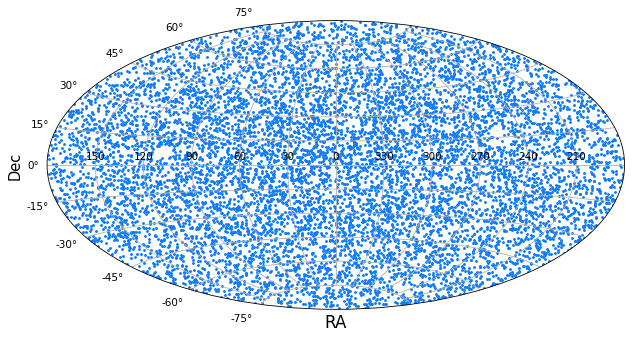

In [14]:
plot_ait(alpha_graus, delta_graus, 'Mapa aitoff')

In [15]:
a0 = np.radians(-35.2)
theta_m = np.radians(60)

#Calcula exposicao
omega = np.zeros(len(delta_rad))
for i in range(len(delta_rad)):
    psi = (np.cos(theta_m) - (np.sin(a0) * np.sin(delta_rad[i])))/(np.cos(a0) * np.cos(delta_rad[i]))
    if (psi > 1):
        alfa_m = 0
    elif (psi < (-1)):
        alfa_m = np.pi
    else:
        alfa_m = np.arccos(psi)

    omega[i] = ((np.cos(a0) * np.cos(delta_rad[i]) * np.sin(alfa_m)) + (alfa_m * np.sin(a0) * np.sin(delta_rad[i])))

In [16]:
# Normaliza o omega
omega_max = max(omega)
omega_relativo = omega/omega_max

In [17]:
# Aplica filtro e seleciona o delta referente
delta_in = []
alpha_in = []
for i in range(len(w)):
    if w[i] < omega_relativo[i]:
        delta_in.append(delta_rad[i])
        alpha_in.append(alpha_rad[i])

In [18]:
#Transforma alpha e delta em graus
alpha_in_graus = np.degrees(alpha_in)
delta_in_graus = np.degrees(delta_in)

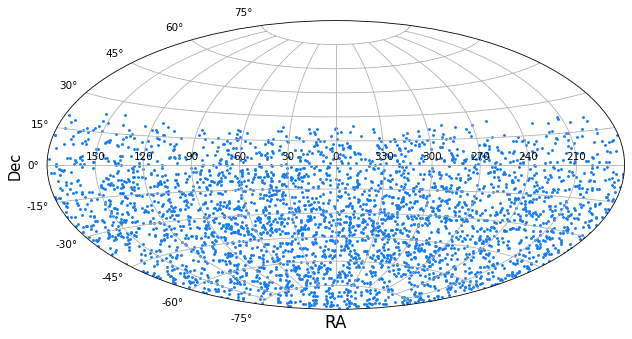

In [19]:
plot_ait(alpha_in_graus, delta_in_graus, 'Filtro exposição')

In [20]:
y_bruto, x_bruto = np.histogram(delta_graus, bins=np.arange(-90,95,5))
y_bruto_in, x_bruto_in = np.histogram(delta_in_graus, bins=np.arange(-90,95,5))

In [21]:
razao = y_bruto_in/y_bruto

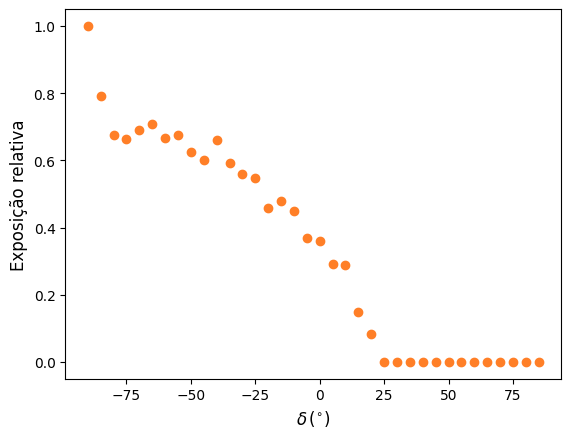

In [22]:
plt.plot(x_bruto[0:-1], razao, 'o', color = orange)
plt.xlabel(r'$\delta\,(^{\circ})$', fontsize = 12)
plt.ylabel('Exposição relativa', fontsize = 12)
plt.savefig(path+'certificaExposicao.png')